Healthcare
Project 1 

DESCRIPTION

Problem Statement: 

ICMR wants to analyze different types of cancers, such as breast cancer, renal cancer, colon cancer, lung cancer, and prostate cancer becoming a cause of worry in recent years. They would like to identify the probable cause of these cancers in terms of genes responsible for each cancer type. This would lead us to early identification of each type of cancer reducing the fatality rate.

 

Dataset Details: 

The input dataset contains 802 samples for the corresponding 802 people who have been detected with different types of cancer. Each sample contains expression values of more than 20K genes. Samples have one of the types of tumors: BRCA, KIRC, COAD, LUAD, and PRAD.

 

Project Task: Week 1

Exploratory Data Analysis:

Merge both the datasets.

Plot the merged dataset as a hierarchically-clustered heatmap.

Perform Null-hypothesis testing.

Dimensionality Reduction:

Each sample has expression values for around 20K genes. However, it may not be necessary to include all 20K genes expression values to analyze each cancer type. Therefore, we will identify a smaller set of attributes which will then be used to fit multiclass classification models. So, the first task targets the dimensionality reduction using various techniques such as,
PCA, LDA, and t-SNE.

Input: Complete dataset including all genes (20531)

Output: Selected Genes from each dimensionality reduction method

 

Project Task: Week 2

Clustering Genes and Samples:

Our next goal is to identify groups of genes that behave similarly across samples and identify the distribution of samples corresponding to each cancer type. Therefore, this task focuses on applying various clustering techniques, e.g., k-means, hierarchical and mean shift clustering, on genes and samples.

First, apply the given clustering technique on all genes to identify:

Genes whose expression values are similar across all samples

Genes whose expression values are similar across samples of each cancer type 

Next, apply the given clustering technique on all samples to identify:

Samples of the same class (cancer type) which also correspond to the same cluster

Samples identified to be belonging to another cluster but also to the same class (cancer type)

Building Classification Model(s) with Feature Selection:

Our final task is to build a robust classification model(s) for identifying each type of cancer. It also aims at the to do feature selection in order to identify the genes that help in classifying each cancer type.

 

Sub-tasks:

Build a classification model(s) using multiclass SVM, Random Forest, and Deep Neural Network to classify the input data into five cancer types

Apply the feature selection algorithms, forward selection and backward elimination to refine selected attributes (selected in Task-2) using the classification model from the previous step

Validate the genes selected from the last step using statistical significance testing (t-test for one vs. all and F-test)

 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#data from dropbox
!wget -P /content/drive/MyDrive/Colab Notebooks https://www.dropbox.com/sh/8q39v4rvo9hq7hy/AADFVG8FAJAdem070Tzc3xkHa/data.csv?dl=0 https://www.dropbox.com/sh/8q39v4rvo9hq7hy/AAB7VCuq4vB-haH4miBEXzg4a/labels.csv?dl=0


--2022-05-16 19:29:53--  http://notebooks/
Resolving notebooks (notebooks)... failed: Name or service not known.
wget: unable to resolve host address ‘notebooks’
--2022-05-16 19:29:53--  https://www.dropbox.com/sh/8q39v4rvo9hq7hy/AADFVG8FAJAdem070Tzc3xkHa/data.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/8q39v4rvo9hq7hy/AADFVG8FAJAdem070Tzc3xkHa/data.csv [following]
--2022-05-16 19:29:53--  https://www.dropbox.com/sh/raw/8q39v4rvo9hq7hy/AADFVG8FAJAdem070Tzc3xkHa/data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc53b51630411201068817747b27.dl.dropboxusercontent.com/cd/0/inline/BlYTBogmIPYveK5C4CNxnZx7JHgfCuQc8Ol9E6DrgE6iwfsFQbIeS4W_fgJ_9qwYoVEVPbD1mZZy_7sCpPh9TUioJTiNvNNjdrNSjXm13XKk1q5kHS6OOW8wmRi4R

In [3]:
import pandas as pd

In [10]:
data=pd.read_csv('/content/drive/MyDrive/Colab/data.csv', delimiter=',')
data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [9]:
data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [12]:
label=pd.read_csv('/content/drive/MyDrive/Colab/labels.csv', delimiter=',')
label.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [13]:
full_data = pd.merge(label,data)
full_data.head()

,Unnamed: 0,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [14]:
full_data.isnull().sum()

Unnamed: 0    0
Class         0
gene_0        0
gene_1        0
gene_2        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20533, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


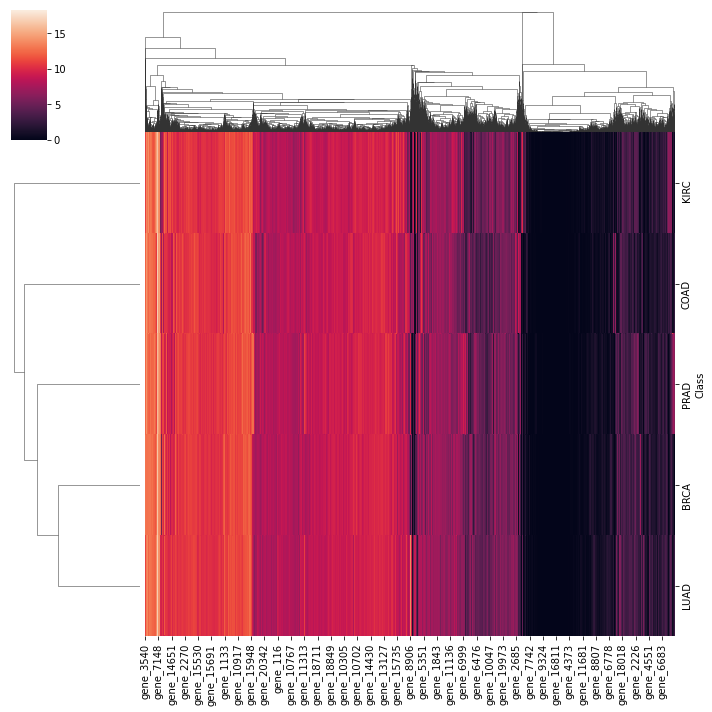

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

heatmap_data = pd.pivot_table(full_data, index=['Class'])
                              
heatmap_data.head()
sns.clustermap(heatmap_data)
plt.savefig('heatmap_with_Seaborn_clustermap_python.jpg',
            dpi=150, figsize=(12,10))

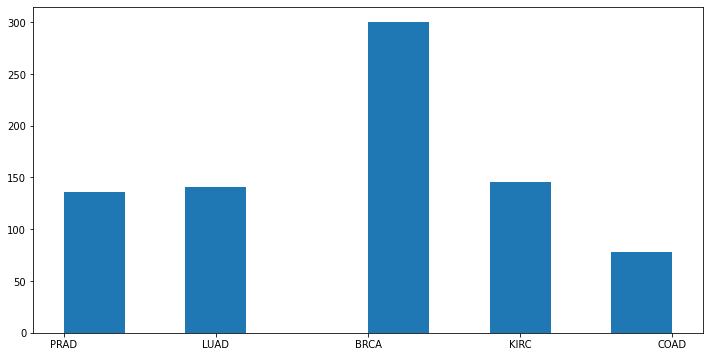

In [21]:
plt.figure(figsize=(12,6))
plt.hist(full_data['Class'])
plt.show()

#we see how distributed each class is

In [22]:
data = full_data.drop(['Unnamed: 0'], axis=1)
data

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,BRCA,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,LUAD,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,COAD,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,PRAD,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [23]:
import numpy as np
import scipy.stats as stats


#F-Test

data_f_test=full_data
def f_test(data_f_test,gene):  
    df_anova = data_f_test[[gene,'Class']]
    grps = pd.unique(df_anova.Class.values)
    grps
    d_data = {grp:df_anova[gene][df_anova.Class == grp] for grp in grps}
    F, p = stats.f_oneway(d_data['LUAD'], d_data['PRAD'], d_data['BRCA'], d_data['KIRC'], d_data['COAD'])
    print("p_values:-",p)
    if p<0.05:
        print("reject null hypothesis")
    else:
        print("accept null hypothesis")
        
    return 

In [24]:
f_test(data_f_test,"gene_3")

p_values:- 5.472971016870503e-77
reject null hypothesis


In [29]:
f_test(data_f_test,"gene_20312")

p_values:- 2.849945200540101e-18
reject null hypothesis


In [28]:
f_test(data_f_test,"gene_578")

p_values:- 5.354758710319586e-25
reject null hypothesis


In [30]:
f_test(data_f_test,"gene_5")

p_values:- nan
accept null hypothesis


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3349: RuntimeWarning: invalid value encountered in double_scalars
  f = msb / msw


In [31]:
df_data = full_data
df_data['Class'] = df_data['Class'].map({'PRAD': 1, 'LUAD': 2, 'BRCA': 3, 'KIRC': 4, 'COAD': 5}) 
df_data = df_data.drop(['Unnamed: 0'],axis=1)

In [32]:
#K2 normality test 
from scipy.stats import normaltest
k2_test = df_data['Class']

stat, p = normaltest(k2_test)
print('stat=%.2f, p=%.30f' %(stat, p))

if p > 0.05:
    print('Normal Distribution')
else:
    print('Not Normal')

stat=48.54, p=0.000000000028833417148493984116
Not Normal


In [34]:
#shapiro test
from scipy.stats import shapiro
stat, p = shapiro(df_data)
print('stat=%.2f, p=%.30f' %(stat, p))

if p > 0.05:
    print('Normal Distribution')
else:
    print('Not Normal')

stat=0.92, p=0.000000000000000000000000000000
Not Normal


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
#dim reduction

In [35]:

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)


colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])



In [36]:
# Define data 
data_pca = full_data.drop(['Unnamed: 0'], axis=1)
data_pca = data_pca.drop(['Class'], axis=1)
data_pca.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [38]:
data_pca.values.shape

(801, 20531)

In [39]:
x_pca = data_pca.values

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(x_pca)
X_Scaled

array([[-0.19479935, -0.82802988,  0.15980044, ..., -1.18793812,
        -0.11648251, -0.26190144],
       [-0.19479935, -2.01501735, -1.415042  , ..., -0.34227662,
        -1.65688871, -0.26190144],
       [-0.19479935,  0.41734754,  1.15673547, ...,  0.88686027,
        -1.85526414, -0.26190144],
       ...,
       [-0.19479935,  0.19888076,  0.57481583, ..., -0.22008186,
        -0.41046699,  1.3485582 ],
       [-0.19479935, -0.35045311, -0.28863152, ...,  1.43719268,
         0.09195083, -0.26190144],
       [-0.19479935, -0.57135218,  0.66725377, ...,  0.45087581,
        -0.47161901, -0.26190144]])

In [42]:
#pca with 5 components
# Import PCA from sklearn and define the n_components as 2 
from sklearn.decomposition import PCA
pca_with_5=PCA(n_components=5)

In [43]:
X_pca_with_5 = pca_with_5.fit_transform(X_Scaled)
X_pca_with_5.shape

(801, 5)

In [45]:
X_pca_with_5

array([[-57.44698695,  95.41098073,  74.3015433 , -12.16678182,
          7.98182878],
       [-16.91943005,   0.73247034, -64.07289958,  -2.09531033,
        -25.42643387],
       [-70.34521789, -19.30332659,  20.48824045,  48.10289124,
         24.43775451],
       ...,
       [ -4.13308968,  15.69001387, -22.64445342, -11.98242331,
        -57.83577812],
       [-30.81475746,  33.52642254,  70.56563587,  16.64365596,
        -16.57997894],
       [-22.34455669,   4.0523563 ,  32.3278757 ,   5.20113334,
        -24.12089816]])

In [46]:
# Put the data back on the 2 columns defined 
df_pca = pd.DataFrame(X_pca_with_5)
df_pca.columns = ['pca1','pca2', 'pca3','pca4', 'pca5']

# Add the convereted categorical data for 
df_pca['cancer_type']=df_data['Class']
df_pca

,pca1,pca2,pca3,pca4,pca5,cancer_type
0,-57.446987,95.410981,74.301543,-12.166782,7.981829,1
1,-16.919430,0.732470,-64.072900,-2.095310,-25.426434,2
2,-70.345218,-19.303327,20.488240,48.102891,24.437755,1
3,-49.161591,-9.227586,61.243770,37.805743,1.038916,1
4,-18.132534,-51.327797,16.598116,-17.699202,26.389147,3
...,...,...,...,...,...,...
796,-12.417385,-42.321573,28.109566,-31.200320,38.814572,3
797,-29.415554,28.526281,-15.956631,-11.635173,-37.071400,2
798,-4.133090,15.690014,-22.644453,-11.982423,-57.835778,5
799,-30.814757,33.526423,70.565636,16.643656,-16.579979,1


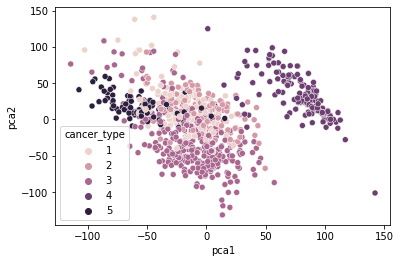

In [51]:
# Present the data on the 5 clusters using seaborn maps 
sns.scatterplot(x='pca1',y='pca2', hue = 'cancer_type',data=df_pca)


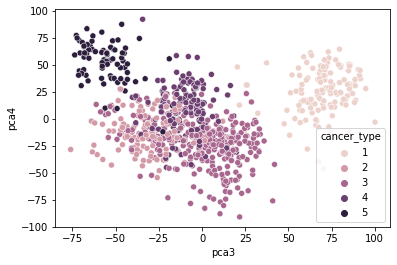

In [52]:
# Present the data on the 5 clusters using seaborn maps 
sns.scatterplot(x='pca3',y='pca4', hue = 'cancer_type',data=df_pca)


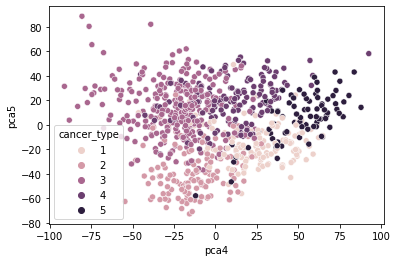

In [53]:
# Present the data on the 5 clusters using seaborn maps 
sns.scatterplot(x='pca4',y='pca5', hue = 'cancer_type',data=df_pca)


In [ ]:
#pca with components 500

In [54]:
pca_with_500=PCA(n_components=500)
X_pca_with_500 = pca_with_500.fit_transform(x_pca)
X_pca_with_500.shape
X_pca_with_500

array([[-62.75541522, -94.07197346,  89.51983114, ...,  -1.60223937,
         -2.18446149,  -3.89823926],
       [ -2.43289636,  90.58584184,  -1.06730787, ...,  -2.45578598,
          1.94230736,   2.08172811],
       [-71.26685285,  -8.06460774,  66.11245485, ...,  -0.74808673,
          1.02847195,   0.34545678],
       ...,
       [ 10.48626145,  21.57059456,  41.34587844, ...,  -2.029738  ,
          0.99725067,   0.63488776],
       [-55.06360486, -92.39477804,  80.05003937, ...,  -5.24163195,
          6.18188209,   4.91429638],
       [-49.10303379, -50.99763908,  40.50375438, ...,  -4.18820333,
         -0.50233295,   2.67609   ]])

In [55]:
df_pca_500 = pd.DataFrame(X_pca_with_500)
df_pca_500['cancer_type']=df_data['Class']
df_pca_500

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,cancer_type
0,-62.755415,-94.071973,89.519831,-15.942567,81.423539,-13.998292,7.716073,-22.936551,-32.837892,-2.202680,...,-3.173930,-3.608291,-1.981286,0.554489,3.122635,0.754561,-1.602239,-2.184461,-3.898239,1
1,-2.432896,90.585842,-1.067308,-53.083120,-15.676684,60.842472,10.257369,-48.822959,14.257400,-12.214352,...,-2.204717,-0.110423,2.177735,3.033339,0.925425,-0.084423,-2.455786,1.942307,2.081728,2
2,-71.266853,-8.064608,66.112455,81.381475,-7.525685,109.824273,5.519407,-13.364480,38.415728,-5.124731,...,-2.314016,2.668439,0.560374,0.786265,0.518529,2.511921,-0.748087,1.028472,0.345457,1
3,-84.770785,-73.244566,74.181000,27.022697,-18.044895,50.116433,-3.495197,-11.318520,8.319656,-3.149509,...,3.280175,-0.661853,-4.072291,-2.938753,3.383305,3.376336,-2.144221,-0.997633,-0.984787,1
4,-69.560171,-9.612940,-67.497549,34.868543,-1.795849,-6.676780,-2.840781,16.780157,-49.319753,10.508631,...,-4.467972,6.355208,5.159157,-1.120661,-1.347371,-4.924223,-1.319247,0.315393,-0.620298,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,-60.861882,-22.278633,-80.927167,42.670292,7.843763,-4.545218,-27.602910,-8.840676,-31.531870,6.380236,...,-0.099376,5.976797,0.519480,-0.084488,-1.861981,-4.064566,6.877313,1.608552,1.830295,3
797,-14.465433,53.392194,38.153904,-63.217345,22.799082,39.543441,-47.899401,39.925172,-12.413483,43.364820,...,-2.727179,-2.589594,3.787618,-1.283094,0.406132,0.486984,0.223123,0.423340,-1.673563,2
798,10.486261,21.570595,41.345878,-59.639929,-2.163066,-96.453878,38.375897,46.997294,60.604643,59.967025,...,2.264429,-0.058230,-0.935668,-1.733877,0.139228,-0.940059,-2.029738,0.997251,0.634888,5
799,-55.063605,-92.394778,80.050039,-7.782015,15.180574,2.563620,8.487660,10.571657,11.710577,1.304005,...,-1.772127,-4.090907,-4.076428,-1.983937,0.701209,-2.561125,-5.241632,6.181882,4.914296,1


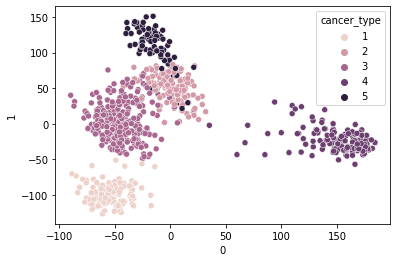

In [56]:
sns.scatterplot(x=0,y=1,hue = 'cancer_type', data=df_pca_500)

In [ ]:
#Dimensionality reduction using  TSNE

In [57]:
df_tsne_data = full_data
non_numeric = ['Unnamed: 0','Class']
df_tsne_data = df_tsne_data.drop(non_numeric, axis=1)
df_tsne_data

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [58]:
#import T-SNE from sklearn
from sklearn.manifold import TSNE
m = TSNE(learning_rate=50)

In [59]:
tnse_features = m.fit_transform(df_tsne_data)
tnse_features[1:4,:]

array([[  1.0605209, -22.613764 ],
       [  7.2191052,  39.91031  ],
       [  7.112234 ,  39.028294 ]], dtype=float32)

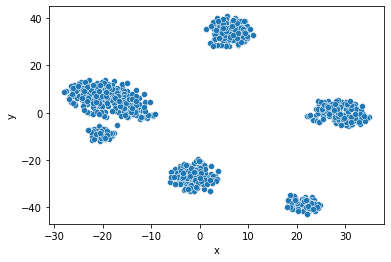

In [60]:
df_tsne_data['x'] = tnse_features[:,0]
df_tsne_data['y'] = tnse_features[:,1]

import seaborn as sns
sns.scatterplot(x='x',y='y',data=df_tsne_data)
plt.show()

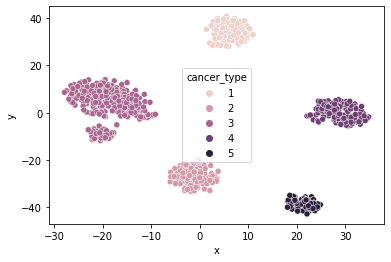

In [61]:
df_tsne_data['cancer_type']=df_data['Class']
sns.scatterplot(x='x',y='y',hue = 'cancer_type', data=df_tsne_data)
plt.show()

In [ ]:
#Dimensionality reduction using LDA

In [62]:
df_lda = full_data.drop(['Unnamed: 0'], axis=1)
df_lda = df_lda.drop(['Class'], axis=1)
x_lda = df_lda
x_lda

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [63]:
x_lda.shape

(801, 20531)

In [64]:
y_lda = full_data['Class']
y_lda.values

array([1, 2, 1, 1, 3, 1, 4, 1, 3, 1, 3, 4, 1, 3, 3, 3, 2, 4, 4, 1, 3, 4,
       2, 3, 4, 2, 5, 3, 3, 3, 3, 3, 4, 3, 1, 3, 4, 2, 3, 3, 4, 1, 1, 4,
       4, 3, 1, 5, 3, 2, 3, 2, 3, 1, 5, 3, 3, 5, 4, 3, 2, 4, 3, 2, 1, 5,
       3, 1, 4, 3, 4, 3, 3, 2, 3, 2, 3, 4, 1, 5, 3, 1, 3, 3, 1, 1, 3, 3,
       4, 3, 1, 1, 3, 3, 3, 1, 5, 3, 1, 3, 3, 4, 3, 4, 2, 4, 2, 5, 2, 2,
       1, 3, 2, 1, 3, 4, 4, 4, 3, 3, 2, 4, 2, 3, 1, 1, 1, 3, 4, 2, 5, 3,
       5, 3, 3, 4, 2, 3, 4, 5, 3, 1, 3, 4, 2, 5, 1, 3, 2, 2, 2, 2, 3, 3,
       2, 3, 3, 1, 1, 2, 1, 2, 4, 3, 1, 2, 5, 4, 2, 3, 4, 2, 3, 2, 3, 3,
       3, 1, 3, 4, 5, 4, 3, 1, 1, 1, 2, 2, 3, 2, 2, 4, 2, 1, 2, 3, 3, 3,
       2, 2, 3, 4, 4, 4, 4, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 3, 3, 3, 2, 3,
       4, 2, 4, 4, 2, 3, 4, 1, 3, 2, 2, 1, 5, 3, 4, 1, 4, 5, 3, 4, 4, 2,
       1, 1, 2, 2, 4, 3, 3, 5, 3, 1, 5, 3, 1, 4, 1, 1, 1, 3, 5, 5, 2, 5,
       5, 1, 2, 3, 3, 4, 4, 3, 5, 1, 4, 1, 3, 3, 4, 3, 3, 3, 3, 2, 2, 3,
       3, 3, 4, 4, 4, 4, 3, 3, 3, 4, 3, 3, 2, 1, 3,

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
x_r2 = lda.fit(x_lda,y_lda).transform(x_lda)

In [66]:
lda.explained_variance_ratio_

array([0.36219022, 0.30156109])

In [67]:
x_r3 = pd.DataFrame(data=x_r2)
x_r3['y']=y_lda
x_r3

,0,1,y
0,-7.958125,10.922818,1
1,-0.301563,-2.780898,2
2,-6.424952,8.870978,1
3,-6.934259,10.417199,1
4,-2.872004,-4.912284,3
...,...,...,...
796,-2.491183,-6.516482,3
797,0.217789,-1.859410,2
798,-1.426674,-0.474514,5
799,-7.800641,12.104337,1


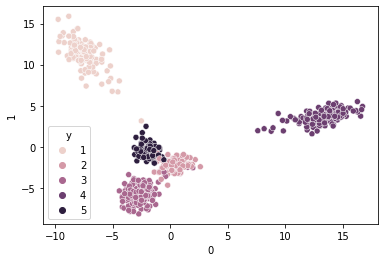

In [68]:
sns.scatterplot(x=0,y=1,hue = 'y', data=x_r3)

In [ ]:
#Clustering Genes and Samples



identify groups of genes that behave similarly across samples and identify the distribution of samples corresponding to each cancer type. Therefore, this task focuses on applying various clustering techniques, e.g., k-means, hierarchical, and mean-shift clustering, on genes and samples.



In [69]:
from sklearn.cluster import KMeans
clusters = KMeans(5, n_init = 5)
clusters.fit(X_pca_with_5)

clusters.labels_

array([1, 4, 3, 1, 0, 1, 2, 1, 0, 1, 0, 2, 1, 4, 0, 0, 4, 2, 2, 1, 0, 2,
       4, 0, 2, 4, 3, 0, 4, 0, 0, 0, 2, 4, 1, 0, 2, 4, 0, 4, 2, 1, 1, 2,
       2, 0, 1, 3, 0, 4, 0, 4, 0, 1, 3, 4, 0, 3, 2, 0, 4, 4, 0, 4, 1, 3,
       4, 1, 2, 4, 2, 0, 4, 4, 0, 4, 0, 4, 1, 3, 0, 1, 0, 0, 1, 1, 0, 0,
       2, 4, 1, 1, 0, 4, 0, 1, 3, 0, 1, 0, 0, 2, 0, 2, 4, 2, 4, 3, 4, 4,
       1, 0, 4, 1, 0, 2, 2, 2, 0, 0, 4, 2, 4, 0, 1, 1, 1, 0, 2, 0, 3, 4,
       3, 0, 0, 2, 4, 0, 2, 3, 0, 1, 0, 2, 4, 3, 1, 0, 4, 4, 4, 4, 0, 0,
       4, 0, 0, 1, 1, 4, 1, 4, 2, 0, 1, 4, 3, 2, 4, 0, 2, 4, 0, 4, 0, 4,
       0, 1, 0, 2, 3, 2, 0, 1, 1, 1, 4, 4, 0, 4, 4, 2, 4, 1, 4, 0, 4, 0,
       4, 4, 0, 2, 2, 2, 2, 1, 4, 1, 4, 4, 4, 0, 1, 0, 1, 0, 0, 0, 4, 0,
       2, 4, 2, 2, 4, 0, 2, 1, 0, 4, 4, 1, 3, 4, 2, 1, 2, 3, 4, 2, 2, 4,
       1, 4, 4, 4, 2, 0, 4, 3, 0, 1, 4, 0, 1, 2, 1, 1, 1, 0, 3, 3, 4, 3,
       3, 1, 4, 3, 0, 2, 2, 0, 3, 1, 2, 1, 0, 0, 2, 0, 0, 0, 4, 4, 4, 0,
       0, 0, 2, 2, 2, 2, 4, 0, 0, 2, 0, 0, 4, 1, 4,

In [70]:
pca_with_5_data_frame = pd.DataFrame(data=X_pca_with_5,columns=['pca1','pca2', 'pca3','pca4', 'pca5'])
pca_with_5_data_frame.head()

,pca1,pca2,pca3,pca4,pca5
0,-57.446987,95.410981,74.301543,-12.166782,7.981829
1,-16.919430,0.732470,-64.072900,-2.095310,-25.426434
2,-70.345218,-19.303327,20.488240,48.102891,24.437755
3,-49.161591,-9.227586,61.243770,37.805743,1.038916
4,-18.132534,-51.327797,16.598116,-17.699202,26.389147


In [71]:
pca_with_5_data_frame['Cls_label'] = clusters.labels_
pca_with_5_data_frame['given_cancer_type'] = label.Class.values
pca_with_5_data_frame

,pca1,pca2,pca3,pca4,pca5,Cls_label,given_cancer_type
0,-57.446987,95.410981,74.301543,-12.166782,7.981829,1,PRAD
1,-16.919430,0.732470,-64.072900,-2.095310,-25.426434,4,LUAD
2,-70.345218,-19.303327,20.488240,48.102891,24.437755,3,PRAD
3,-49.161591,-9.227586,61.243770,37.805743,1.038916,1,PRAD
4,-18.132534,-51.327797,16.598116,-17.699202,26.389147,0,BRCA
...,...,...,...,...,...,...,...
796,-12.417385,-42.321573,28.109566,-31.200320,38.814572,0,BRCA
797,-29.415554,28.526281,-15.956631,-11.635173,-37.071400,4,LUAD
798,-4.133090,15.690014,-22.644453,-11.982423,-57.835778,4,COAD
799,-30.814757,33.526423,70.565636,16.643656,-16.579979,1,PRAD


In [72]:
brca = pca_with_5_data_frame.groupby('given_cancer_type').get_group('BRCA')
brca.Cls_label.value_counts()

0    238
4     60
3      2
Name: Cls_label, dtype: int64

In [73]:
luad = pca_with_5_data_frame.groupby('given_cancer_type').get_group('LUAD')
luad.Cls_label.value_counts()

4    136
3      3
0      2
Name: Cls_label, dtype: int64

In [74]:
coad = pca_with_5_data_frame.groupby('given_cancer_type').get_group('COAD')
coad.Cls_label.value_counts()

3    72
4     6
Name: Cls_label, dtype: int64

In [75]:
prad = pca_with_5_data_frame.groupby('given_cancer_type').get_group('PRAD')
prad.Cls_label.value_counts()

1    133
3      1
4      1
0      1
Name: Cls_label, dtype: int64

In [76]:
kirc = pca_with_5_data_frame.groupby('given_cancer_type').get_group('KIRC')
kirc.Cls_label.value_counts()

2    144
4      2
Name: Cls_label, dtype: int64

In [77]:
clusters.cluster_centers_

array([[ -6.76992406, -46.92079137,   3.77582977, -18.3179285 ,
         14.93529274],
       [-21.10020255,  16.52127181,  70.92044371,  25.04092965,
        -14.6435429 ],
       [ 78.9709547 ,  32.72528012,  -9.85412994,  11.57199448,
         20.28689239],
       [-61.11080086,  19.09218284, -54.55680443,  52.06726274,
          9.68049176],
       [-10.57217743,  14.19000473, -22.7705782 , -22.65091012,
        -25.99124491]])

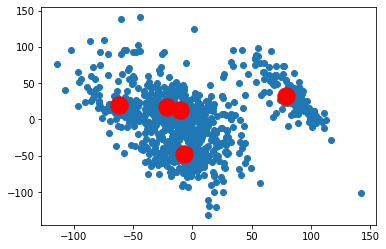

In [79]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_pca_with_5)
plt.scatter(X_pca_with_5[:,0], X_pca_with_5[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [ ]:
#KMEANS Clustering with PCA 500

In [80]:
from sklearn.cluster import KMeans
clusters_500 = KMeans(5, n_init = 5)
clusters_500.fit(X_pca_with_500)
clusters_500.labels_

array([3, 2, 3, 3, 0, 3, 1, 3, 0, 3, 0, 1, 3, 0, 0, 0, 2, 1, 1, 3, 0, 1,
       2, 0, 1, 2, 4, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 2, 0, 0, 1, 3, 3, 1,
       1, 0, 3, 4, 0, 2, 0, 2, 0, 3, 4, 0, 0, 4, 1, 0, 2, 0, 0, 2, 3, 4,
       0, 3, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1, 3, 4, 0, 3, 0, 0, 3, 3, 0, 0,
       1, 0, 3, 3, 0, 0, 0, 3, 4, 0, 3, 0, 0, 1, 0, 1, 2, 1, 2, 4, 2, 2,
       3, 0, 2, 3, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 3, 3, 3, 0, 1, 0, 4, 0,
       4, 0, 0, 1, 2, 0, 1, 4, 0, 3, 0, 1, 2, 4, 3, 0, 2, 2, 2, 2, 0, 0,
       2, 0, 0, 3, 3, 2, 3, 2, 1, 0, 3, 2, 4, 1, 2, 0, 1, 2, 0, 2, 0, 0,
       0, 3, 0, 1, 4, 1, 0, 3, 3, 3, 2, 2, 0, 2, 2, 1, 2, 3, 2, 0, 0, 0,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 2, 2, 0, 3, 0, 3, 0, 0, 0, 2, 0,
       1, 2, 1, 1, 2, 0, 1, 3, 0, 2, 2, 3, 4, 0, 1, 3, 1, 4, 0, 1, 1, 2,
       3, 3, 2, 2, 1, 0, 0, 4, 0, 3, 4, 0, 3, 1, 3, 3, 3, 0, 4, 4, 2, 4,
       4, 3, 2, 0, 0, 1, 1, 0, 4, 3, 1, 3, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 3, 0,

In [81]:
pca_with_500_data_frame = pd.DataFrame(data=X_pca_with_500)
pca_with_500_data_frame.head()
pca_with_500_data_frame['Cls_label'] = clusters.labels_
pca_with_500_data_frame['given_cancer_type'] = label.Class.values

In [82]:
pca_with_500_data_frame.shape

(801, 502)

In [83]:
brca_500 = pca_with_500_data_frame.groupby('given_cancer_type').get_group('BRCA')
brca_500.Cls_label.value_counts()

0    238
4     60
3      2
Name: Cls_label, dtype: int64

In [84]:
luad_500 = pca_with_500_data_frame.groupby('given_cancer_type').get_group('LUAD')
luad_500.Cls_label.value_counts()

4    136
3      3
0      2
Name: Cls_label, dtype: int64

In [85]:
coad_500 = pca_with_500_data_frame.groupby('given_cancer_type').get_group('COAD')
coad_500.Cls_label.value_counts()

3    72
4     6
Name: Cls_label, dtype: int64

In [86]:
prad_500 = pca_with_500_data_frame.groupby('given_cancer_type').get_group('PRAD')
prad_500.Cls_label.value_counts()

1    133
3      1
4      1
0      1
Name: Cls_label, dtype: int64

In [87]:
kirc_500 = pca_with_500_data_frame.groupby('given_cancer_type').get_group('KIRC')
kirc_500.Cls_label.value_counts()

2    144
4      2
Name: Cls_label, dtype: int64

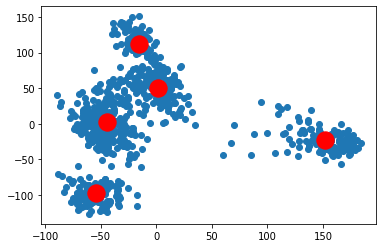

In [88]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_pca_with_500)
plt.scatter(X_pca_with_500[:,0], X_pca_with_500[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [89]:
#Build Classification Models

In [90]:
#Build decision tree clasifier

ml_x = x_lda
ml_y = y_lda
ml_x.shape,ml_y.shape
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ml_x,ml_y,test_size=0.30,random_state=40)

In [91]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(x_train,y_train)
dt_clf.score(x_test,y_test)

y_pred=(dt_clf.predict(x_test))
dt_clf.score(x_test,y_test)

0.983402489626556

In [92]:
#SVM

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
sv_clf = SVC(probability=True, kernel='linear')
sv_clf.fit(x_train,y_train)
sv_clf.score(x_test,y_test)


y_pred = sv_clf.predict(x_test)
print(accuracy_score(y_test,y_pred))


0.995850622406639


In [93]:
#Random Forest


from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)
rf_clf.score(x_test,y_test)

0.991701244813278

In [94]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB
gb_clf = GaussianNB()
gb_clf.fit(x_train,y_train)
gb_clf.score(x_test,y_test)

0.8630705394190872

In [ ]:
#GRADBosting Clf

In [ ]:
gbt_clf = ensemble.GradientBoostingClassifier(n_estimators=40) 
gbt_clf.fit(x_train,y_train) 
gbt_clf.score(x_test,y_test)

In [97]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(x_train,y_train)
knn_clf.score(x_test,y_test)

0.995850622406639

In [98]:
#Recursive Feature Elimination


# automatically select the number of features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.883 (0.027)


In [99]:
#One Way F-Test

df_tsne = pd.DataFrame(data=tnse_features,columns=['tsne1','tsne2'])
df_tsne['cancer_type']=label['Class']
df_tsne

,tsne1,tsne2,cancer_type
0,4.027820,28.656755,PRAD
1,1.060521,-22.613764,LUAD
2,7.219105,39.910309,PRAD
3,7.112234,39.028294,PRAD
4,-19.958717,6.566510,BRCA
...,...,...,...
796,-19.329189,8.952929,BRCA
797,-2.519500,-32.370678,LUAD
798,18.567549,-34.851940,COAD
799,7.948632,33.793690,PRAD


In [100]:
df_anova_tsne = df_tsne[['tsne2','cancer_type']]
grps_tsne = pd.unique(df_anova_tsne.cancer_type.values)

d_data = {grp:df_anova_tsne['tsne2'][df_anova_tsne.cancer_type == grp] for grp in grps_tsne}

F, p = stats.f_oneway(d_data['LUAD'], d_data['PRAD'], d_data['BRCA'], d_data['KIRC'], d_data['COAD'])

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


In [101]:
df_anova_tsne = df_tsne[['tsne1','cancer_type']]
grps_tsne = pd.unique(df_anova_tsne.cancer_type.values)

d_data = {grp:df_anova_tsne['tsne1'][df_anova_tsne.cancer_type == grp] for grp in grps_tsne}

F, p = stats.f_oneway(d_data['LUAD'], d_data['PRAD'], d_data['BRCA'], d_data['KIRC'], d_data['COAD'])

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


In [102]:
#DNN

features=full_data.drop(['Unnamed: 0'],axis=1)
features=features.drop(['Class'],axis=1)
target=full_data['Class']
features.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [103]:
target.head()

0    1
1    2
2    1
3    1
4    3
Name: Class, dtype: int64

In [104]:
f1=features.values

In [105]:
y1 = pd.get_dummies(y_lda)

In [106]:
from sklearn.model_selection import train_test_split

#y1 = pd.get_dummies(Xg_fea.Pos_Neg)

X1_train, X1_valid, y1_train, y1_valid = train_test_split(f1,y1, test_size = 0.10, random_state=42)

In [107]:
X1_train.shape,X1_valid.shape,y1_valid.shape,y1_train.shape

((720, 20531), (81, 20531), (81, 5), (720, 5))

In [108]:
import tensorflow as tf

In [109]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#adding layers of inout
model.add(tf.keras.layers.Dense(10000, input_dim=20531, activation='relu', kernel_initializer='he_uniform'))


#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(5000, activation='relu'))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(2000, activation='relu'))

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(1000, activation='relu'))

#Add 4th hidden layer
model.add(tf.keras.layers.Dense(500, activation='relu'))

#Add 5th hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

#Add 6th hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(5, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [110]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10000)             205320000 
                                                                 
 batch_normalization (BatchN  (None, 10000)            40000     
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 5000)              50005000  
                                                                 
 dense_2 (Dense)             (None, 2000)              10002000  
                                                                 
 dense_3 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_4 (Dense)             (None, 500)               500500    
                                                        

In [111]:
history = model.fit(X1_train,y1_train,          
          validation_data=(X1_valid,y1_valid),
          epochs=10,
          batch_size=32)

Epoch 1/10
23/23 [==============================] - 40s 2s/step - loss: 0.2367 - accuracy: 0.9319 - val_loss: 5.3065 - val_accuracy: 0.5432
Epoch 2/10
23/23 [==============================] - 43s 2s/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 2.3207 - val_accuracy: 0.5556
Epoch 3/10
23/23 [==============================] - 29s 1s/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.8620 - val_accuracy: 0.6790
Epoch 4/10
23/23 [==============================] - 33s 1s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1661 - val_accuracy: 0.9506
Epoch 5/10
23/23 [==============================] - 37s 2s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0339 - val_accuracy: 0.9877
Epoch 6/10
23/23 [==============================] - 41s 2s/step - loss: 9.2415e-04 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 7/10
23/23 [==============================] - 29s 1s/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 8/10
23/23

In [112]:
modelpred = model.predict(X1_valid)

In [113]:
y_pr=[]
for k in modelpred:
    #np.argmax(k)
    #print(np.argmax(k))
    y_pr.append(np.argmax(k))
    
y_val=[]
for k in y1_valid.values:
    #np.argmax(k)
    #print(np.argmax(k))
    y_val.append(np.argmax(k))

In [114]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pr)

array([[14,  0,  0,  0,  0],
       [ 0, 17,  0,  0,  0],
       [ 0,  0, 31,  0,  0],
       [ 0,  0,  0, 12,  0],
       [ 0,  0,  0,  0,  7]])

In [115]:
#Evaluate

_, train_acc = model.evaluate(X1_train, y1_train, verbose=0)
_, test_acc = model.evaluate(X1_valid, y1_valid, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 1.000


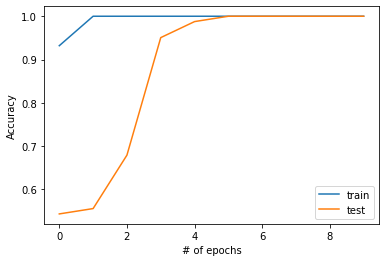

In [116]:
#plot History

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('# of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()